<a href="https://colab.research.google.com/github/ChahatKumar/ADLS/blob/master/AI_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PAPER :
# **Predictive Data Mining Models for Novel Coronavirus (COVID-19) Infected Patients’ Recovery** #
### Journal : Springer 2020 

[Paper Link](https://link.springer.com/article/10.1007/s42979-020-00216-w)

________________________________________________________________________________________________________________________________________


In this study, data mining models were developed for the prediction of COVID-19 infected patients’ recovery using epidemiological dataset of COVID-19 patients of South Korea.

___________________________________________________________________________________


In [ ]:
#installing dependencies 
!pip install kaggle


In [ ]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle (18).json


{'kaggle.json': b'{"username":"chahatkumar07","key":"b2d61985316d885a5394e64c015649db"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d kimjihoo/coronavirusdataset

coronavirusdataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
filename = "coronavirusdataset.zip"

with ZipFile(filename , 'r') as zip :
  zip.extractall()
  print("Tada !")

Tada !


In [ ]:
#importing libraries 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [ ]:
fileName = "PatientInfo.csv"
df = pd.read_csv(fileName)


In [ ]:
df.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [ ]:
df.shape

(5165, 14)

In [ ]:
df = df[['patient_id','sex','age','infection_case','confirmed_date','released_date','deceased_date','state']]

In [ ]:
df.head()

,patient_id,sex,age,infection_case,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,overseas inflow,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,overseas inflow,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,contact with patient,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,overseas inflow,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,contact with patient,2020-01-31,2020-02-24,NaN,released


 ##  **Visualising the data**                                                                 

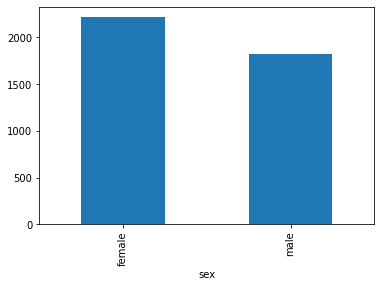

In [ ]:
df.groupby('sex')['patient_id'].nunique().plot(kind='bar')
plt.show()

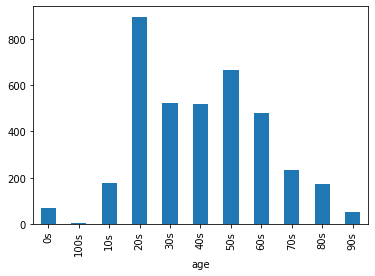

In [ ]:
df.groupby('age')['patient_id'].nunique().plot(kind='bar')
plt.show()

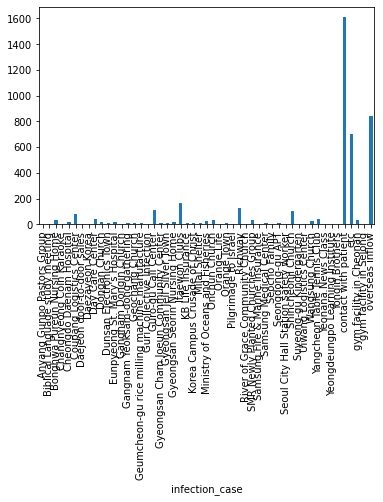

In [ ]:
df.groupby('infection_case')['patient_id'].nunique().plot(kind='bar')
plt.show()

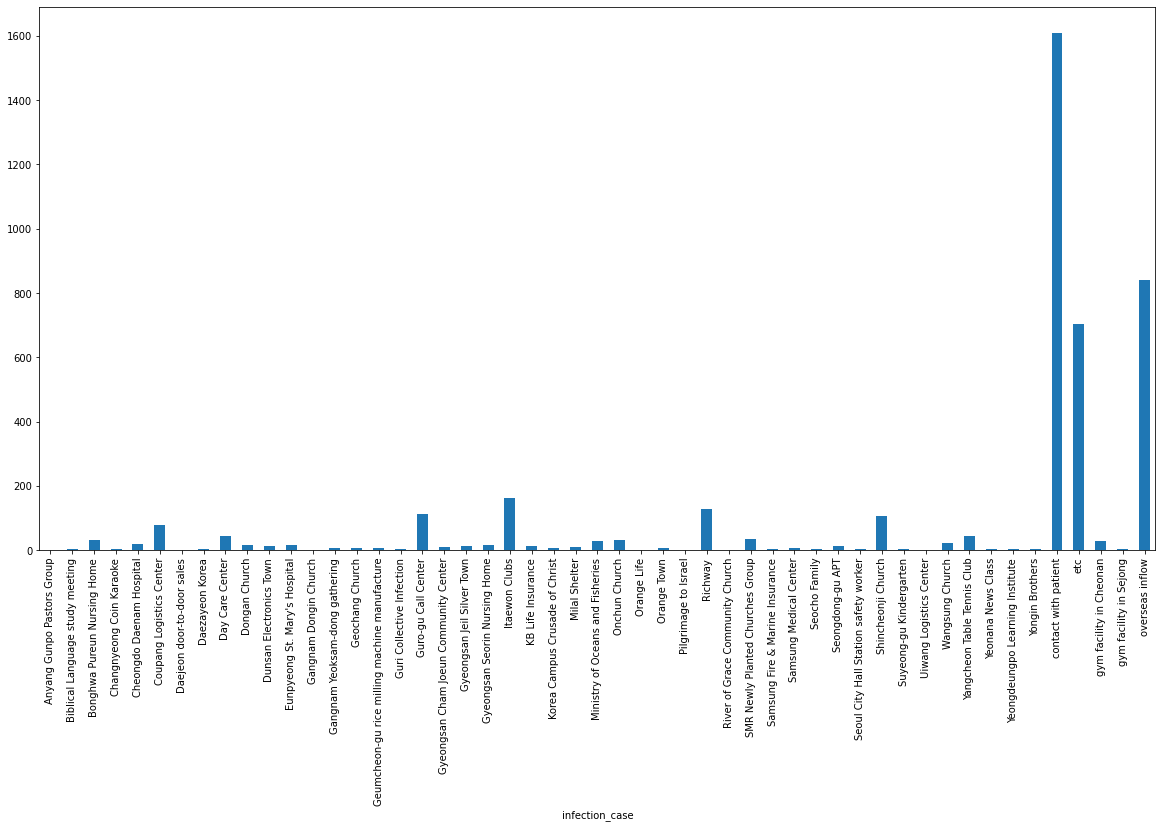

In [ ]:
fig = plt.figure()
df.groupby('infection_case')['patient_id'].nunique().plot(kind='bar')

fig.set_size_inches(20, 10)
plt.show()

##**Processing**

In [ ]:
released_date = df['released_date']
deceased_date = df['deceased_date']

In [ ]:
released_date


0       2020-02-05
1       2020-03-02
2       2020-02-19
3       2020-02-15
4       2020-02-24
           ...    
5160    2020-06-13
5161    2020-06-24
5162           NaN
5163           NaN
5164           NaN
Name: released_date, Length: 5165, dtype: object

In [ ]:
# removing patinets that are isolated - where released and deceased entries both are NaN

dropIndex = []

def removeIsolationPatients() :
    
    index=[]
    # function to remove row entries where both released and 
    for i in range(5165) :
        if (type(deceased_date[i])!=str and type(released_date[i])!=str) :
              index.append(i)
    
    return index
                    
dropIndex = removeIsolationPatients()

In [ ]:
print(len(dropIndex))

3514


In [ ]:
for i in dropIndex :
    df = df.drop(i)

In [ ]:
df.shape


(1651, 8)

In [ ]:
# removing entries where data cell in NaN

df = df[df['sex'].notna()]
df = df[df['age'].notna()]
df = df[df['infection_case'].notna()]
df = df[df['confirmed_date'].notna()]
df = df[df['state'] != "isolated"]

In [ ]:
df.shape


(1025, 8)

In [ ]:
df.reset_index(inplace=True)
df.head()

,index,patient_id,sex,age,infection_case,confirmed_date,released_date,deceased_date,state
0,0,1000000001,male,50s,overseas inflow,2020-01-23,2020-02-05,NaN,released
1,1,1000000002,male,30s,overseas inflow,2020-01-30,2020-03-02,NaN,released
2,2,1000000003,male,50s,contact with patient,2020-01-30,2020-02-19,NaN,released
3,3,1000000004,male,20s,overseas inflow,2020-01-30,2020-02-15,NaN,released
4,4,1000000005,female,20s,contact with patient,2020-01-31,2020-02-24,NaN,released


In [ ]:
from datetime import datetime
import math

In [ ]:
no_days = []

def daysFunction() :
   
    confirmed_date = df['confirmed_date']
    released_date = df['released_date']
    deceased_date = df['deceased_date']
    
    j =0;

    for i in range(len(confirmed_date)) :
        if(type(released_date[i])==str) :
            date1 = datetime.strptime(confirmed_date[i], '%Y-%m-%d')
            date2 = datetime.strptime(released_date[i], '%Y-%m-%d')
            no_days.append((date2 -date1).days)
        
        elif(type(deceased_date[i])==str):
            date1 = datetime.strptime(confirmed_date[i], '%Y-%m-%d')
            date2 = datetime.strptime(deceased_date[i], '%Y-%m-%d')
            no_days.append((date2 -date1).days)



    return no_days 

In [ ]:
no_days = daysFunction()


In [ ]:
df['no_days'] = no_days


In [ ]:
df.head()

,index,patient_id,sex,age,infection_case,confirmed_date,released_date,deceased_date,state,no_days
0,0,1000000001,male,50s,overseas inflow,2020-01-23,2020-02-05,NaN,released,13
1,1,1000000002,male,30s,overseas inflow,2020-01-30,2020-03-02,NaN,released,32
2,2,1000000003,male,50s,contact with patient,2020-01-30,2020-02-19,NaN,released,20
3,3,1000000004,male,20s,overseas inflow,2020-01-30,2020-02-15,NaN,released,16
4,4,1000000005,female,20s,contact with patient,2020-01-31,2020-02-24,NaN,released,24


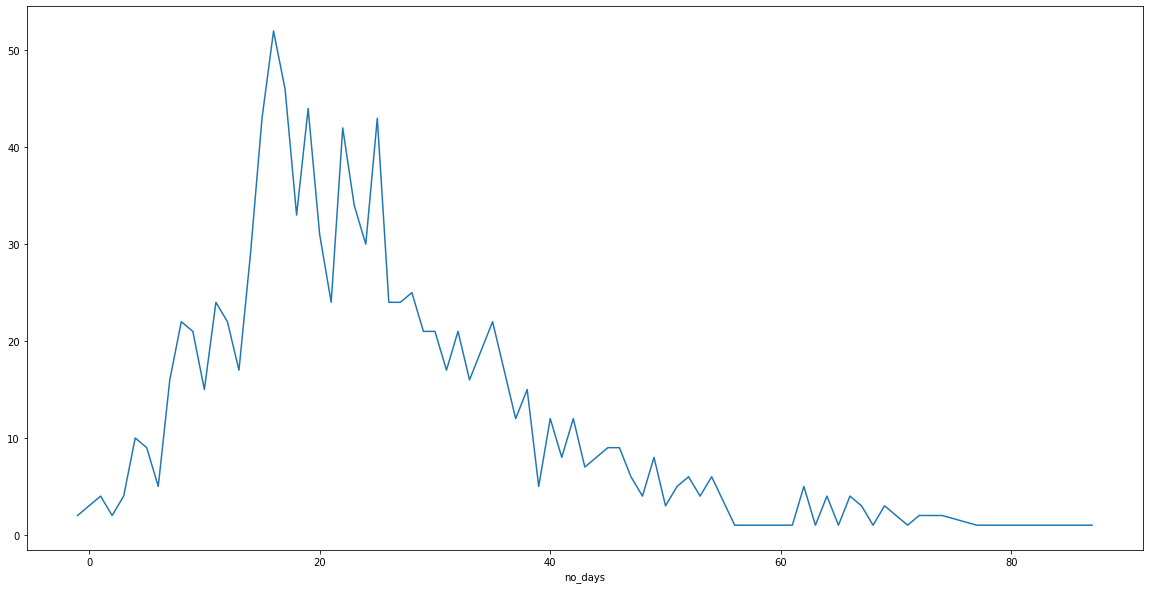

In [ ]:
fig = plt.figure()
df.groupby('no_days')['patient_id'].nunique().plot(kind='line')

fig.set_size_inches(20, 10)
plt.show()

In [ ]:
df = df[['sex','age','infection_case','no_days','state']]
df.head()

,sex,age,infection_case,no_days,state
0,male,50s,overseas inflow,13,released
1,male,30s,overseas inflow,32,released
2,male,50s,contact with patient,20,released
3,male,20s,overseas inflow,16,released
4,female,20s,contact with patient,24,released


##**Encoding Categorical Variables** 

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
le_gender = LabelEncoder()
le_age = LabelEncoder()
le_infection_case = LabelEncoder()
le_state = LabelEncoder()

In [ ]:
df['gender_n']= le_gender.fit_transform(df['sex'])
df['age_n']= le_age.fit_transform(df['age'])
df['infection_case_n']= le_infection_case.fit_transform(df['infection_case'])
df['state_n']= le_state.fit_transform(df['state'])

In [ ]:
df.head()

,sex,age,infection_case,no_days,state,gender_n,age_n,infection_case_n,state_n
0,male,50s,overseas inflow,13,released,1,6,20,1
1,male,30s,overseas inflow,32,released,1,4,20,1
2,male,50s,contact with patient,20,released,1,6,16,1
3,male,20s,overseas inflow,16,released,1,3,20,1
4,female,20s,contact with patient,24,released,0,3,16,1


In [ ]:
df = df.drop(['sex','age','infection_case','state'], axis="columns")
df.head()

,no_days,gender_n,age_n,infection_case_n,state_n
0,13,1,6,20,1
1,32,1,4,20,1
2,20,1,6,16,1
3,16,1,3,20,1
4,24,0,3,16,1


In [ ]:
x = df[['gender_n','age_n','infection_case_n','no_days']]
y = df['state_n']


In [ ]:
x,y

(      gender_n  age_n  infection_case_n  no_days
 0            1      6                20       13
 1            1      4                20       32
 2            1      6                16       20
 3            1      3                20       16
 4            0      3                16       24
 ...        ...    ...               ...      ...
 1020         1      4                16       46
 1021         0      3                20       32
 1022         0      2                20       12
 1023         0      4                 8       34
 1024         0      4                20       14
 
 [1025 rows x 4 columns], 0       1
 1       1
 2       1
 3       1
 4       1
        ..
 1020    1
 1021    1
 1022    1
 1023    1
 1024    1
 Name: state_n, Length: 1025, dtype: int64)

# **Training** 

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)


In [ ]:
len(x_train) , len(x_test)


(820, 205)

In [ ]:
Model = []
Accuracy = []

## Decison tree

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train ,y_train)
acc1 = model.score(x_test,y_test)
print(acc1)


0.9804878048780488


## SVC

In [ ]:

from sklearn.svm import SVC
model2 = SVC()
model2.fit(x_train, y_train)
acc2 = model2.score(x_test,y_test)
print(acc2)



0.9658536585365853


## Naive Bayes 

In [ ]:

from sklearn.naive_bayes  import BernoulliNB
model3 = BernoulliNB()
model3.fit(x_train, y_train)
acc3 = model.score(x_test,y_test)
print(acc3)


0.9609756097560975



## Logistic Regression

In [ ]:

from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression()
model4.fit(x_train, y_train)
acc4 = model4.score(x_test,y_test)
print(acc4)


0.975609756097561


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier()
model5.fit(x_train, y_train)
acc5 = model5.score(x_test,y_test)
print(acc5)

0.9658536585365853


## KNN 

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
model6 = KNeighborsClassifier(n_neighbors = 3)
model6.fit(x_train, y_train)
acc6 = model6.score(x_test,y_test)
print(acc6)


0.9658536585365853


 ## **Comparing the performance**

In [ ]:
Model = ["Decision tree" ,"SVM" , "Naive Bayes" ," Logistic Regression " , "Random Forest" , "KNN"]
Accuracy = [ acc1, acc2, acc3, acc4,acc5, acc6]



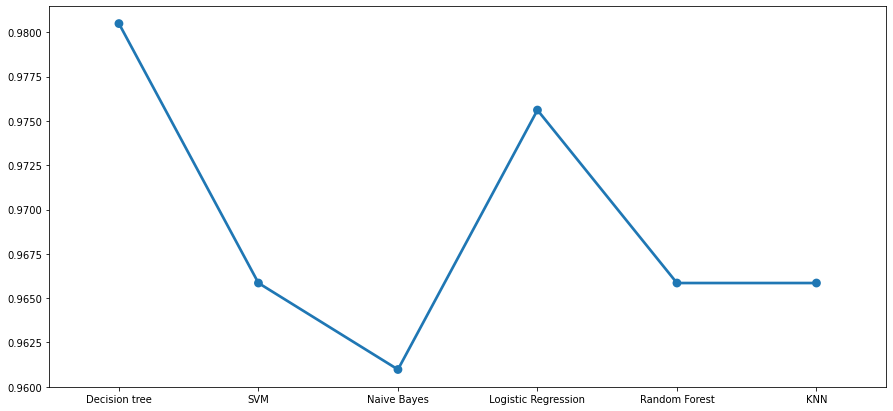

In [ ]:
fig = plt.figure()

#scale_factor = 0.01 
#plt.ylim(0.9 * scale_factor, 1 * scale_factor)

sns.pointplot(x= Model, y= Accuracy) 

fig.set_size_inches(15, 7)

plt.show() 